# 회귀분석 실습

## 1. 단순 회귀분석(p.286~)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [5]:
f = '/content/mnt/MyDrive/데이터/판다스데이터분석_실습/예제_파이썬머신러닝 판다스 데이터분석/part3'

### 자료설명
- 1970년대 후반과 1980년대 초 자동차의 연비를 예측하기 위해 고전적인 Auto MPG 데이터 세트
- MPG는 miles per gallon이고, displacement는 이동거리, Horsepower는 마력이 되겠다.
- 마지막에 Origin은 엔진을 만든 국가를 나타낸다. 1은 USA, 2는 Europe, 그리고 3은 Japan이다.
- https://www.kaggle.com/uciml/autompg-dataset

## 1. 데이터 준비

In [28]:
df = pd.read_csv(f'{f}/auto-mpg.csv')

In [29]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.head())
print('\n')

pd.set_option('display.max_columns', 10) # Ipython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  15.0          8         350.0      165.0  3693.0          11.5          70   
1  18.0          8         318.0      150.0  3436.0          11.0          70   
2  16.0          8         304.0      150.0  3433.0          12.0          70   
3  17.0          8         302.0      140.0  3449.0          10.5          70   
4  15.0          8         429.0      198.0  4341.0          10.0          70   

   origin                name  
0       1   buick skylark 320  
1       1  plymouth satellite  
2       1       amc rebel sst  
3       1         ford torino  
4       1    ford galaxie 500  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  15.0          8         350.0      165.0  3693.0          11.5          70   
1  18.0          8         318.0      150.0  3436.0          11.0          70   
2  16.0          8         304.0      150.0  3433.0          12.0          7

## 2. 데이터 탐색

In [30]:
cnt=0

for i in df['horsepower']:
    print(cnt,float(i)*0.1) # 어떤 문자때문에 오류가 생기는지 확인하는 방법, 또는 예외처리, type확인으로도 가능(방법 다양)
    cnt+=1

0 16.5
1 15.0
2 15.0
3 14.0
4 19.8
5 22.0
6 21.5
7 22.5
8 19.0
9 17.0
10 16.0
11 15.0
12 22.5
13 9.5
14 9.5
15 9.700000000000001
16 8.5
17 8.8
18 4.6000000000000005
19 8.700000000000001
20 9.0
21 9.5
22 11.3
23 9.0
24 21.5
25 20.0
26 21.0
27 19.3
28 8.8
29 9.0
30 9.5


ValueError: ignored

In [22]:
# 데이터 자료형 확인
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB
None




In [23]:
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인

['165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0' '170.0'
 '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00' '113.0'
 '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0' '180.0'
 '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00' '80.00'
 '54.00' '208.0' '155.0' '130.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [25]:
#df = df[df['horsepower'] != '?'] # np.nan으로 바꾸고 dropna를 하는 것과 동일한 결과.
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
31,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
125,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
329,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
335,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
353,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
373,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [31]:
# np.nan으로 바꾸는 이유는 나중에 dropna로 한번에 제거 하기 위해서이다.
df['horsepower'].replace('?', np.nan, inplace=True)
print(df['horsepower'].unique())
df.dropna(subset=['horsepower'], axis=0, inplace=True) # axis=0으로 행단위로 한 줄에 na값이 있는 줄은 모두 삭제
df.info()

['165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0' '170.0'
 '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00' '113.0'
 '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0' '180.0'
 '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00' '80.00'
 '54.00' '208.0' '155.0' '130.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cy

In [32]:
df['horsepower'] =df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  391 non-null    float64
 6   model year    391 non-null    int64  
 7   origin        391 non-null    int64  
 8   name          391 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.5+ KB


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777643     -0.804899   -0.778165 -0.832065   
cylinders    -0.777643   1.000000      0.950824    0.843315  0.898146   
displacement -0.804899   0.950824      1.000000    0.897265  0.933129   
horsepower   -0.778165   0.843315      0.897265    1.000000  0.864397   
weight       -0.832065   0.898146      0.933129    0.864397  1.000000   
acceleration  0.422188  -0.502281     -0.542209   -0.688857 -0.415883   
model year    0.579960  -0.341595     -0.367163   -0.415239 -0.307733   
origin        0.564652  -0.568186     -0.613875   -0.454509 -0.584540   

              acceleration  model year    origin  
mpg               0.422188    0.579960  0.564652  
cylinders        -0.502281   -0.341595 -0.568186  
displacement     -0.542209   -0.367163 -0.613875  
horsepower       -0.688857   -0.415239 -0.454509  
weight           -0.415883   -0.307733 -0.584540  
acceleration      1.000000    0.2865

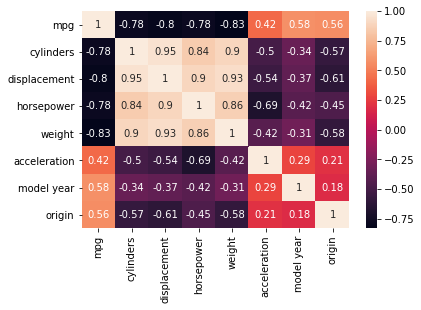

In [39]:
print(df.corr()) # 상관계수
sns.heatmap(df.corr(), annot=True)
plt.show()

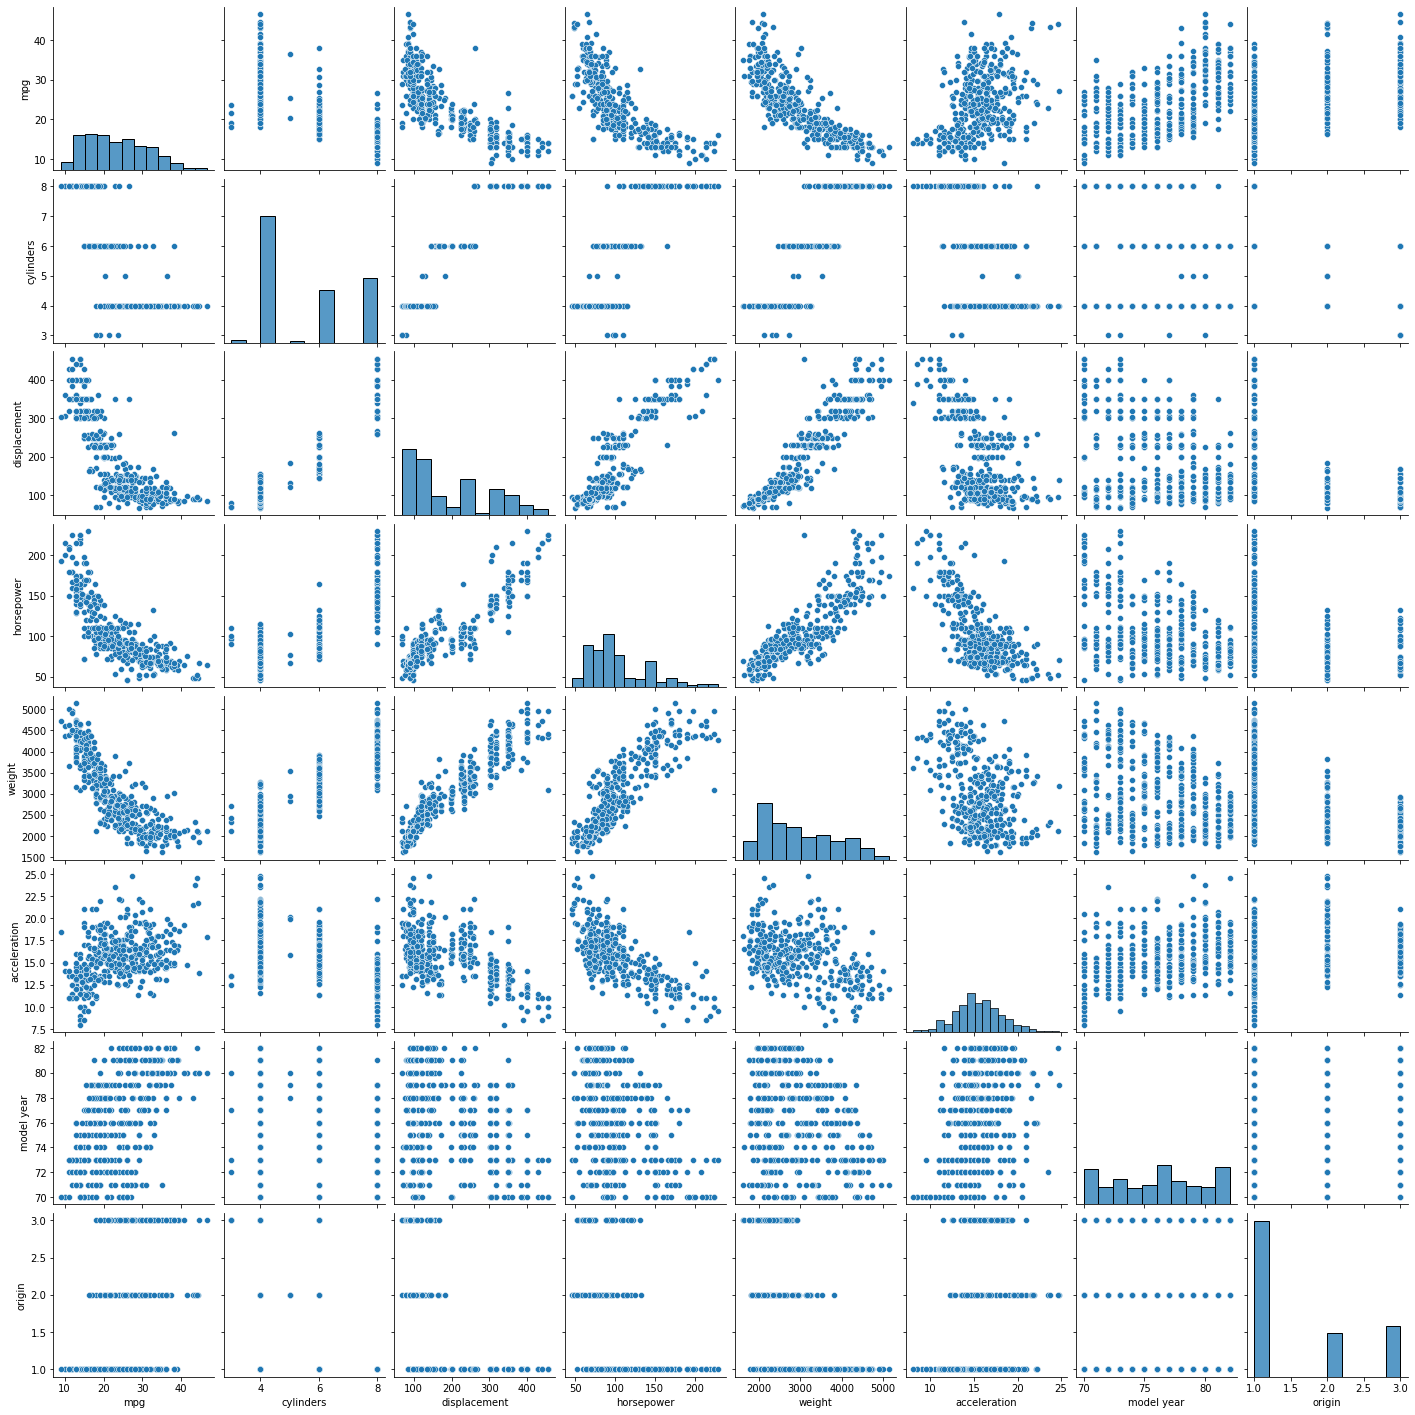

In [45]:
sns.pairplot(df)
plt.show()

## 3. 속성(feature 또는 variable) 선택
- y값(종속변수, 레이블)
- x값(독립변수, 특징값)
- 앞의 상관계수, heatmap, pairplot을 사용하여 상관도가 높은 독립변수 선택하기!

In [33]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

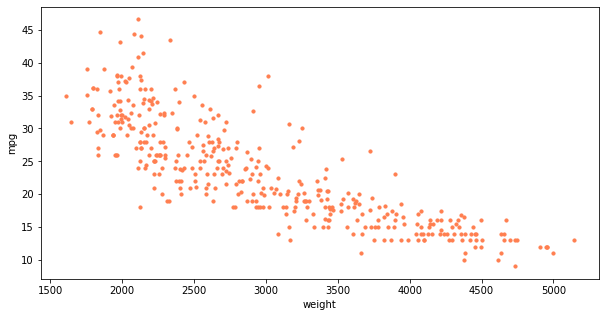

In [40]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

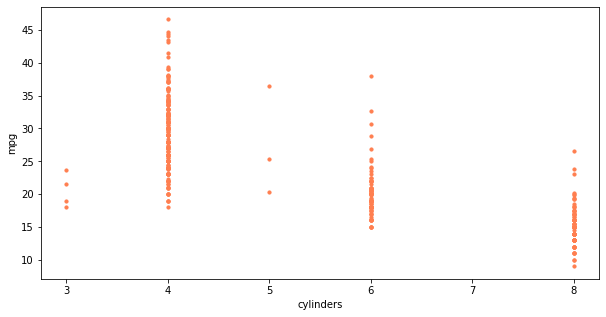

In [41]:
ndf.plot(kind='scatter', x='cylinders', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

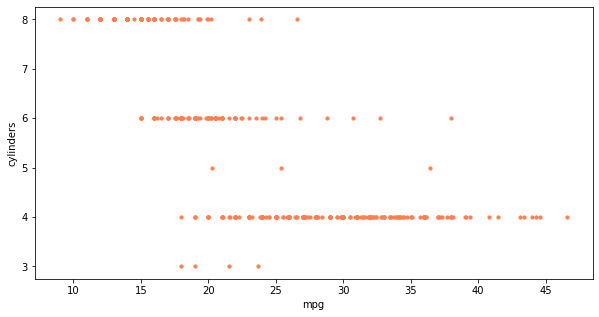

In [42]:
ndf.plot(kind='scatter', y='cylinders', x='mpg', c='coral', s=10, figsize=(10,5)) # mpg가 높아질수록 cylinders는 낮아짐
plt.show()

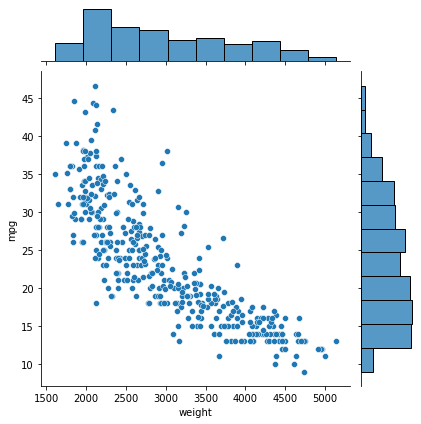

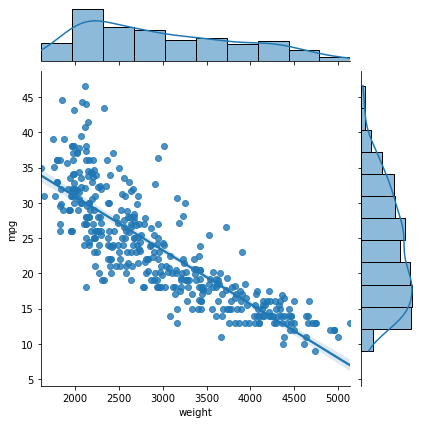

In [44]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시
plt.show()

## 4. 훈련/검증 데이터 분할
- 훈련데이터 : w,b를 세팅, $R^2$값을 높여야 함)
- 검증데이터 : 세팅된 w,b로 확인, $R^2$값이 높은지 확인함
- 테스트데이터 : 세팅된 w,b로 확인, $R^2$값이 높은지 확인함<br>
<br>
- 훈련 데이터는 집에서 문제지와 답을 보면서 공부하는 것
- 검증 데이터는 집에서 답지를 보지 않고 문제풀고 답과 맞추는 것
- 테스트 데이터는 학교 모의고사 문제를 직접 풀고 답과 나중에 맞추어 보는 것
- 미래 데이터를 예측하는 것은 대입시험을 보러가는 것과 비유할 수 있다.

In [58]:
# 속성변수 선택
X = ndf[['weight']] # 독립 변수
y = ndf['mpg'] # 종속 변수

# train data와 test data 구분(7:3비율, 보통 0.1~0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)
print(X_train.shape, X_test.shape)

(273, 1) (118, 1)


## 5. 모형 학습 및 검증

In [60]:
from sklearn.linear_model import LinearRegression
# 모형 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
print(lr.score(X_test, y_test), lr.score(X_train,y_train))

0.7035812683047353 0.6842008579127954


In [54]:
# 회귀식의 기울기
print(lr.coef_)

# 회귀식의 절편
print(lr.intercept_)

[-0.00770318]
46.603926171480815


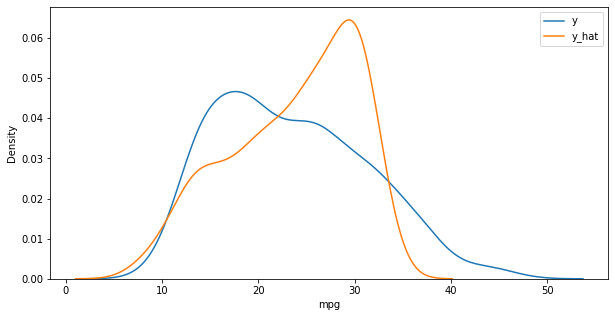

In [64]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X) # 예측

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

## 6. 다중회귀분석

- 훈련/검증 데이터 분할

In [68]:
# 속성변수 선택
X = ndf[['weight', 'cylinders', 'horsepower']] # 독립 변수
y = ndf['mpg'] # 종속 변수

# train data와 test data 구분(7:3비율, 보통 0.1~0.3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)
print(X_train.shape, X_test.shape)

(273, 3) (118, 3)


- 모형 학습 및 검증

In [69]:
# 모형 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 계산
print(lr.score(X_test, y_test), lr.score(X_train,y_train))

0.7187012273294773 0.6987968417541932


In [70]:
# 회귀식의 기울기
print(lr.coef_) # 다중 회귀분석이기 때문에 계수가 3개 나옴.

# 회귀식의 절편
print(lr.intercept_)

[-0.00507452 -0.56850996 -0.0422319 ]
46.28267147300808


- 다중회귀분석 회귀식 : $\hat{y}=-0.00507452w1-0.56850996w2-0.0422319w3+46.28267147300808$

In [84]:
X.values.shape

(391, 3)

In [85]:
lr.coef_.shape

(3,)

In [96]:
y_hat=np.dot(X.values,lr.coef_)+lr.intercept_
y_hat

array([16.02611789, 17.96374859, 17.97897215, 18.3200988 , 11.34417482,
       10.34910421, 10.77339365,  9.77765364, 14.17362039, 16.47464626,
       16.66353725, 16.31452889, 16.57243878, 27.95983454, 24.4834599 ,
       24.69839291, 26.15411136, 29.4834922 , 32.75421606, 26.7753331 ,
       27.87667176, 27.94461097, 27.89994438, 25.633406  ,  9.23581344,
       11.08210274, 10.6293366 ,  9.57119617, 29.4834922 , 28.71904243,
       28.69056573, 25.2821303 , 20.98598048, 21.75533742, 22.39913232,
       21.96339283, 13.40766446, 11.69134231, 14.19354599, 14.61456397,
        8.98859244, 10.47148657,  8.26096535, 23.19536804, 28.74848546,
       21.99383996, 23.22627943, 29.11124901, 29.43455005, 30.52783965,
       30.32011895, 32.26643032, 32.90942626, 32.16804397, 31.13170779,
       28.43683962, 29.84164549, 30.29013608, 27.98831124, 29.08080188,
       13.07782052, 12.09222956, 14.41665761, 14.32040904, 16.76616136,
        9.44009535, 12.34314848, 12.365417  , 11.27099373, 28.65

In [95]:
lr.predict(X)

array([16.02611789, 17.96374859, 17.97897215, 18.3200988 , 11.34417482,
       10.34910421, 10.77339365,  9.77765364, 14.17362039, 16.47464626,
       16.66353725, 16.31452889, 16.57243878, 27.95983454, 24.4834599 ,
       24.69839291, 26.15411136, 29.4834922 , 32.75421606, 26.7753331 ,
       27.87667176, 27.94461097, 27.89994438, 25.633406  ,  9.23581344,
       11.08210274, 10.6293366 ,  9.57119617, 29.4834922 , 28.71904243,
       28.69056573, 25.2821303 , 20.98598048, 21.75533742, 22.39913232,
       21.96339283, 13.40766446, 11.69134231, 14.19354599, 14.61456397,
        8.98859244, 10.47148657,  8.26096535, 23.19536804, 28.74848546,
       21.99383996, 23.22627943, 29.11124901, 29.43455005, 30.52783965,
       30.32011895, 32.26643032, 32.90942626, 32.16804397, 31.13170779,
       28.43683962, 29.84164549, 30.29013608, 27.98831124, 29.08080188,
       13.07782052, 12.09222956, 14.41665761, 14.32040904, 16.76616136,
        9.44009535, 12.34314848, 12.365417  , 11.27099373, 28.65

## (참고 P.198) 정규화
- 각 변수에 들어 있는 숫자 데이터의 상대적 크기 차이 떄문에 머신러닝 분석 결과가 달라질 수 있다.
- 예를 들어 A변수가 B변수보다 상대적으로 큰 숫가 값을 갖으면 A변수의 영향이 더 커진다.
- 따라서 숫자 데이터의 상대적인 크기 차이를 제거하기 위해 정규화를 한다.
- 정규화 과정을 거친 데이터의 범위는 0\~1 또는 -1\~1이 된다.
- sklearn 정규화(표준화, 스케일링) : StandardScaler, minmaxScaler 등
- 정규화를 한 것과 안 한것을 비교하여 결정계수(다른 기준도 있음)가 더 높은 것을 선택하기!

In [99]:
X.describe() # 상대적으로 weight의 숫자가 cylinders보다 크기 때문에 weight의 영향이 더 커짐.

,weight,cylinders,horsepower
count,391.000000,391.000000,391.000000
mean,2976.237852,5.465473,104.404092
std,850.071941,1.703152,38.518732
min,1613.000000,3.000000,46.000000
25%,2224.500000,4.000000,75.000000
50%,2800.000000,4.000000,93.000000
75%,3616.500000,8.000000,125.000000
max,5140.000000,8.000000,230.000000
